In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# import torch,os
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from datasets import Dataset
import torch

In [ ]:
filename = "Full-Balanced version - Numeric one.xlsx"

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel(filename)

# Save the DataFrame to another format (optional)
df.to_csv("output.csv")  # Save as CSV
# Load data from your CSV/file (replace with your loading logic)
data = pd.read_csv("output.csv", encoding="utf-8")
data.head()

,Unnamed: 0,old indices,sentence,class,label
0,0,3,ابحث عن مجلد image processing,بحث,"{ ""نوع العنصر"":""مجلد"",""image processing"":""اسم ..."
1,1,6,من فضلك ابحث عن مجلد album 1,بحث,"{ ""نوع العنصر"":""مجلد"",""album 1"":""اسم العنصر""}"
2,2,9,من فضلك ابحث عن مجلد math 1,بحث,"{ ""نوع العنصر"":""مجلد"",""math 1"":""اسم العنصر""}"
3,3,10,ابحث في الحاسوب عن مجلد grades,بحث,"{ ""نوع العنصر"":""مجلد"",""grades"":""اسم العنصر""}"
4,4,12,ابحث في الحاسوب عن مجلد results,بحث,"{ ""نوع العنصر"":""مجلد"",""results"":""اسم العنصر""}"


In [ ]:
data.drop('label', axis=1, inplace=True)
data.drop('old indices', axis=1, inplace=True)


In [ ]:
new_data = []
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []

for i in range(272):
  class1.append(data.iloc[i])

for i in range(272, 544):
  class2.append(data.iloc[i])

for i in range(544, 740):
  class3.append(data.iloc[i])

for i in range(740, 1012):
  class4.append(data.iloc[i])

for i in range(1012, 1208):
  class5.append(data.iloc[i])

for i in range(1208, 1469):
  class6.append(data.iloc[i])

for i in range(1469, 1534):
  class5.append(data.iloc[i])

for i in range(1534, 1599):
  class3.append(data.iloc[i])

for i in range(1599, 1690):
  class4.append(data.iloc[i])

for i in range(1690, 1780):
  class2.append(data.iloc[i])

for i in range(1780, 1872):
  class1.append(data.iloc[i])

i = 0
while len(new_data) != 1872:
  if i < len(class1):
    new_data.append(class1[i])

  if i < len(class2):
    new_data.append(class2[i])

  if i < len(class3):
    new_data.append(class3[i])

  if i < len(class4):
    new_data.append(class4[i])

  if i < len(class5):
    new_data.append(class5[i])

  if i < len(class6):
    new_data.append(class6[i])

  i += 1

new_data = pd.DataFrame(new_data, columns=['sentence', 'class'])

new_data['sentence']

0                           ابحث عن مجلد image processing
272                              في تمام 1 قم بغلق الجهاز
544                      انتظر ساعتين ثم اعد تشغيل الجهاز
740                        اضبط المنبه ليصدر صوت بعد ساعة
1012     من فضلك بعد ساعة و21 دقيقة ضع الجهاز في وضع ا...
                              ...                        
1779                      في تمام الساعة 3 قم بغلق الجهاز
1688                         قم بضبط المؤقت لمدة 62 دقيقة
1870     ابحث عن مجلد ملفات الألعاب الإلكترونية الترفيهية
1689                         قم بضبط المؤقت لمدة 72 دقيقة
1871         ابحث عن مجلد ملفات الأفلام الوثائقية البيئية
Name: sentence, Length: 1872, dtype: object

In [ ]:
# Create a DataFrame
df = pd.DataFrame({'sentences': new_data['sentence'], 'labels': new_data['class']})

# Display the DataFrame
print(df.head())

                                              sentences  \
0                         ابحث عن مجلد image processing   
272                            في تمام 1 قم بغلق الجهاز   
544                    انتظر ساعتين ثم اعد تشغيل الجهاز   
740                      اضبط المنبه ليصدر صوت بعد ساعة   
1012   من فضلك بعد ساعة و21 دقيقة ضع الجهاز في وضع ا...   

                         labels  
0                           بحث  
272                         غلق  
544          اعادة تشغيل الجهاز  
740                         ضبط  
1012  ايقاف تشغيل الجهاز مؤقتاً  


In [ ]:
unique_values = list(set(df['labels']))

In [ ]:
NUM_LABELS = len(unique_values)

id2label = {idx: label for idx, label in enumerate(unique_values)}
label2id = {label: idx for idx, label in enumerate(unique_values)}

In [ ]:
df["labels"] = df.labels.map(lambda x:label2id[x.strip()])

<Axes: ylabel='count'>

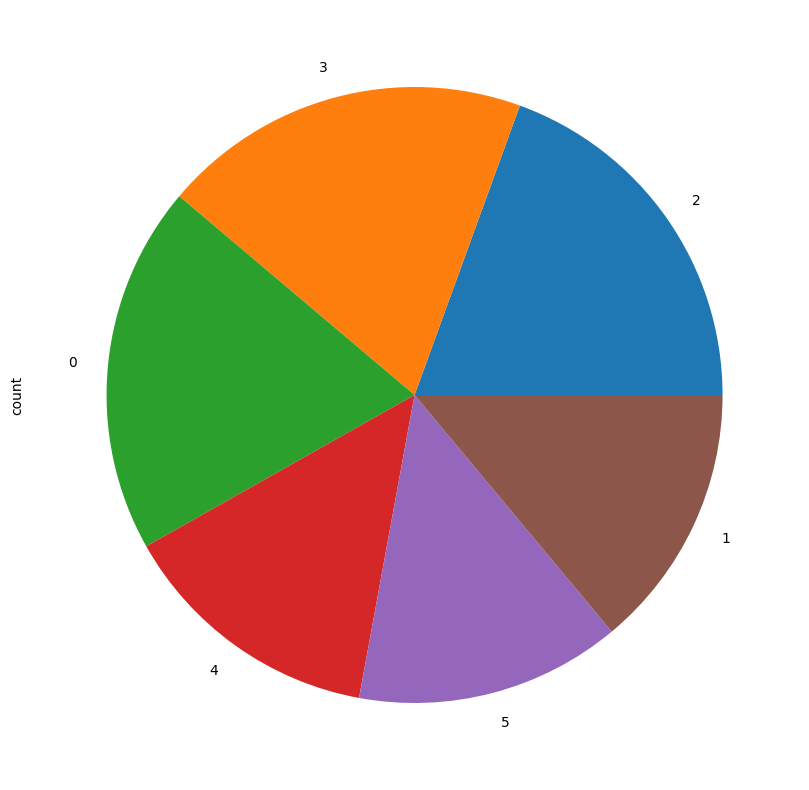

In [ ]:
df.labels.value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("aubmindlab/bert-base-arabertv2", max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

In [ ]:
model = BertForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv2", num_labels=NUM_LABELS ,
                                                      id2label = id2label,label2id = label2id)


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
SIZE = len(df['sentences'])

train_size = int(0.8 * SIZE)

train_texts = list(df.sentences[:train_size])
test_texts = list(df.sentences[train_size:])
train_labels = list(df.labels[:train_size])
test_labels = list(df.labels[train_size:])

# Check the lengths of train and test sets
print("Train data length:", len(train_texts))
print("Test data length:", len(test_texts))

Train data length: 1497
Test data length: 375


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True , padding = True)
test_encodings  = tokenizer(test_texts, truncation=True , padding = True)

In [ ]:
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
from sklearn.metrics import classification_report
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./TTC4900Model',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
     # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics= compute_metrics
)

In [ ]:
test_pred = trainer.predict(test_dataset)

test_preds = test_pred.predictions.argmax(-1)

print("Classification Report - Test Data:")
print(classification_report(test_labels, test_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.26      0.79      0.39       112
           1       0.00      0.00      0.00        12
           2       0.16      0.05      0.08       114
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        12

    accuracy                           0.25       375
   macro avg       0.07      0.14      0.08       375
weighted avg       0.13      0.25      0.14       375



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 1.6698697805404663,
 'eval_Accuracy': 0.25066666666666665,
 'eval_F1': 0.07901483879270237,
 'eval_Precision': 0.07093920267572963,
 'eval_Recall': 0.13972431077694236,
 'eval_runtime': 0.7373,
 'eval_samples_per_second': 508.646,
 'eval_steps_per_second': 16.277}

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.569000,1.062451,0.778667,0.598846,0.621352,0.727809
100,0.452100,0.219297,0.946667,0.827868,0.892473,0.871032
150,0.027800,0.149370,0.973333,0.940129,0.920635,0.985119
200,0.013700,0.004061,1.000000,1.000000,1.000000,1.000000
250,0.004900,0.005033,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=282, training_loss=0.36708332682754974, metrics={'train_runtime': 32.0244, 'train_samples_per_second': 140.237, 'train_steps_per_second': 8.806, 'total_flos': 131553571621932.0, 'train_loss': 0.36708332682754974, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.005371978972107172,
 'eval_Accuracy': 1.0,
 'eval_F1': 1.0,
 'eval_Precision': 1.0,
 'eval_Recall': 1.0,
 'eval_runtime': 0.2175,
 'eval_samples_per_second': 1724.076,
 'eval_steps_per_second': 55.17,
 'epoch': 3.0}

In [ ]:
# Evaluate the model
train_pred = trainer.predict(train_dataset)
test_pred = trainer.predict(test_dataset)

# Extract predicted labels
train_preds = train_pred.predictions.argmax(-1)
test_preds = test_pred.predictions.argmax(-1)

# Print classification reports
print("Classification Report - Train Data:")
print(classification_report(train_labels, train_preds))

print("Classification Report - Test Data:")
print(classification_report(test_labels, test_preds))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       249
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       249
           4       1.00      1.00      1.00       250
           5       1.00      1.00      1.00       249

    accuracy                           1.00      1497
   macro avg       1.00      1.00      1.00      1497
weighted avg       1.00      1.00      1.00      1497

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       114
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        12

    ac

In [ ]:
model_path = 'arabic-text-classification-model'
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('arabic-text-classification-model/tokenizer_config.json',
 'arabic-text-classification-model/special_tokens_map.json',
 'arabic-text-classification-model/vocab.txt',
 'arabic-text-classification-model/added_tokens.json',
 'arabic-text-classification-model/tokenizer.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
shutil.move("arabic-text-classification-model", "/content/drive/My Drive/")

'/content/drive/My Drive/arabic-text-classification-model'